# DATA PRE-PROCESSING

/tmp/ipykernel_4796/1247063237.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_boston = pd.read_csv('/media/sf_MV_COMP/data/housing.data', delim_whitespace = True, header = None)


Text(0, 0.5, 'MEDV')

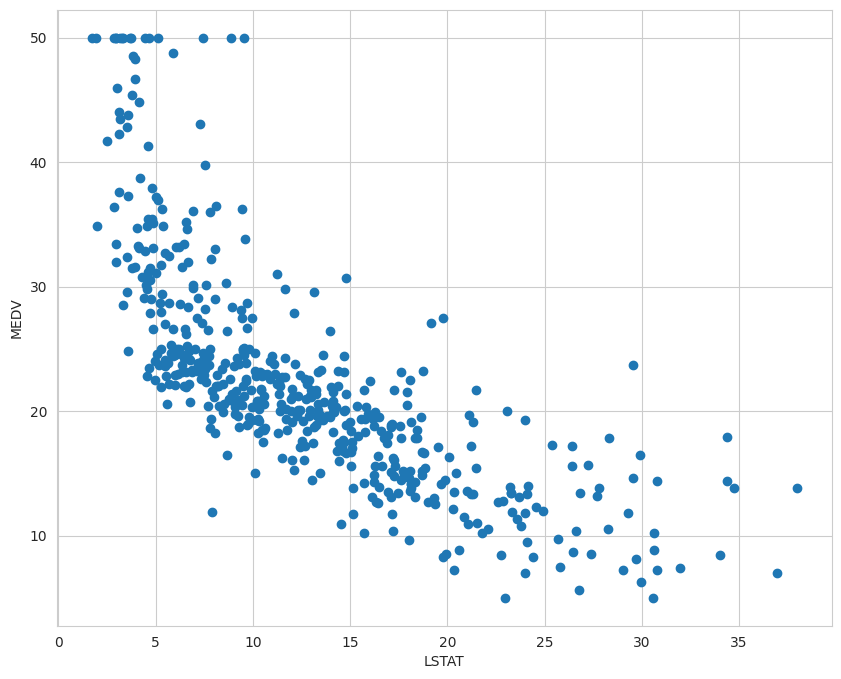

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

# Cargamos el dataframe con los datos del .data
df_boston = pd.read_csv('/media/sf_MV_COMP/data/housing.data', delim_whitespace = True, header = None)
df_boston.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# Establecemos las variables que vamos a comparar
x = df_boston[['LSTAT']].values # Variable predictora
y = df_boston[['MEDV']].values # Variable objetivo a predecir
y = y.ravel()

plt.figure(figsize = (10, 8))
plt.scatter(x, y)

plt.xlabel('LSTAT')
plt.ylabel('MEDV')

# SIN PRE-PROCESSING

Text(0, 0.5, 'SSE')

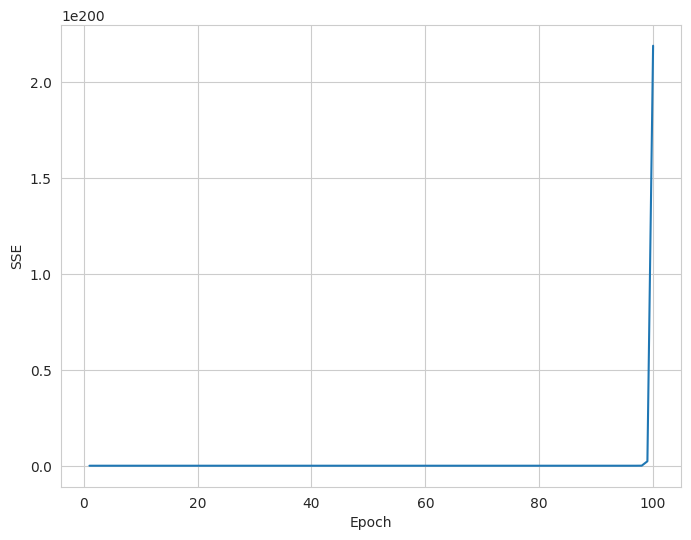

In [3]:
# Descenso por gradiente para ajustar un modelo de regresión lineal simple (o múltiple) y
    # va registrando cómo evoluciona el error (la suma de cuadrados de los errores) a lo largo de las iteraciones

# Tamaño del paso que damos en cada iteracion
alpha = 0.0001
# Creamos un array inicializado a 0 con la cantidad de elementos de x + 1.
w_ = np.zeros(1 + x.shape[1])
# Almacena como evoluciona el precio
cost_ = []
# Numero de veces que repetimos la actualizacion
n_ = 100

for i in range (n_):
    # Prediccion
    # Multiplica cada fila de x por el coeficiente correspondiente almacenado en w_ y luego suma una base almacenada en w_[0]
    y_pred = np.dot(x, w_[1:]) + w_[0]
    # Predice cuanto se equivoco el modelo
    errors = (y - y_pred)

    # Punto de ajuste de los coeficientes y del valor fijo
    # Giramos la tabla (filas son colum y colum son filas) y obtenemos cuanto contribuyo cada variable al error y multiplicamos por el paso que establecimos antes
    w_[1:] += alpha * x.T.dot(errors)
    # Aqui modificamos la base, haciendo uso de la sumatoria de los errores para que se ajuste
    w_[0] += alpha * errors.sum()

    # Calculo del coste
    cost = (errors ** 2).sum() / 2.0
    cost_.append(cost)

plt.figure(figsize = (8, 6))
plt.plot(range(1, n_ + 1), cost_)

plt.xlabel('Epoch')
plt.ylabel('SSE')

- En esta gráfica vemos la evolución de la suma de cuadrados de errores (SSE) a lo largo de 100 epochs. En vez de disminuir, el SSE aumenta de manera dramática a partir de cierto número de iteraciones: eso indica que, al no haber escalado ni normalizado las variables, el descenso por gradiente se descontrola y el modelo diverge en lugar de converger.

---

# CON PRE-PROCESSING

Text(0, 0.5, 'SSE')

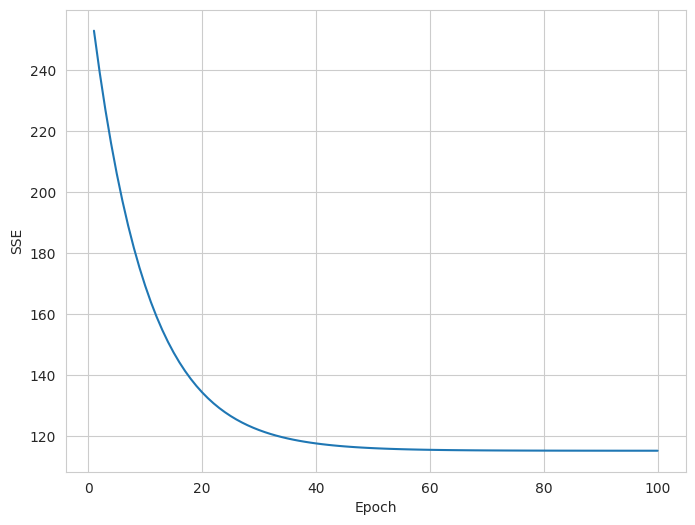

In [4]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x_std = sc_x.fit_transform(x)
y_std = sc_y.fit_transform(y.reshape(-1, 1)).flatten()

# Descenso por gradiente para ajustar un modelo de regresión lineal simple (o múltiple) y
    # va registrando cómo evoluciona el error (la suma de cuadrados de los errores) a lo largo de las iteraciones

# Tamaño del paso que damos en cada iteracion
alpha = 0.0001
# Creamos un array inicializado a 0 con la cantidad de elementos de x + 1.
w_ = np.zeros(1 + x_std.shape[1])
# Almacena como evoluciona el precio
cost_ = []
# Numero de veces que repetimos la actualizacion
n_ = 100

for i in range (n_):
    # Prediccion
    # Multiplica cada fila de x por el coeficiente correspondiente almacenado en w_ y luego suma una base almacenada en w_[0]
    y_pred = np.dot(x_std, w_[1:]) + w_[0]
    # Predice cuanto se equivoco el modelo
    errors = (y_std - y_pred)

    # Punto de ajuste de los coeficientes y del valor fijo
    # Giramos la tabla (filas son colum y colum son filas) y obtenemos cuanto contribuyo cada variable al error y multiplicamos por el paso que establecimos antes
    w_[1:] += alpha * x_std.T.dot(errors)
    # Aqui modificamos la base, haciendo uso de la sumatoria de los errores para que se ajuste
    w_[0] += alpha * errors.sum()

    # Calculo del coste
    cost = (errors ** 2).sum() / 2.0
    cost_.append(cost)

plt.figure(figsize = (8, 6))
plt.plot(range(1, n_ + 1), cost_)

plt.xlabel('Epoch')
plt.ylabel('SSE')

- En esta gráfica mostramos la evolución de la suma de cuadrados de errores (SSE) a lo largo de 100 epochs tras escalar y normalizar los datos. Observamos que el SSE disminuye rápidamente durante las primeras iteraciones y luego se estabiliza en torno a un valor mínimo. Esto indica que, al procesar correctamente las variables (centrado y escalado), el descenso por gradiente converge de forma suave y estable hacia la mejor solución

---

# ⚙️ Data Preprocessing

El **preprocesamiento de datos** es un paso esencial en *machine learning* para preparar las variables antes de entrenar un modelo.  

---

## 🔹 Técnicas principales

### 1. Estandarización / Eliminación de la media
- Consiste en **centrar los datos**.  
- Transforma los valores para que tengan **media = 0** y **varianza = 1**.  

---

### 2. Min-Max Scaling (Escalado a un rango)
- Lleva los valores a un **rango específico**, por ejemplo:  
  \[
  [0, 1] \quad \text{o} \quad [-1, 1]
  \]
- Muy útil cuando las variables tienen escalas muy diferentes.  

---

### 3. Normalización
- Ajusta la escala de **cada muestra individual**.  
- Suele basarse en métricas como la **norma L1 o L2**.  

---

### 4. Binarización
- Convierte los valores en **0 o 1** en función de un **umbral definido**.  
- Útil para transformar datos continuos en representaciones categóricas.  

---

## 📌 Supuestos en aprendizaje automático
- Muchos algoritmos asumen que las características siguen una **distribución normal**.  
- La mayoría de los métodos se basan en **supuestos lineales**.  
- En general, se requiere que los datos estén distribuidos de forma **Gaussiana con media cero y varianza unitaria**.  

---


---
---
---

# 📊 Scikit-learn: Estandarización de Datos

En la práctica, a menudo **ignoramos la forma de la distribución** y simplemente transformamos los datos para:  

1. **Centrarlos** → eliminando el valor medio de cada característica.  
2. **Escalarlos** → dividiendo las características no constantes por su desviación estándar.  

---

## 📌 ¿Por qué es importante?
Muchos algoritmos de *machine learning* suponen que:  
- Todas las características están **centradas alrededor de cero**.  
- Todas tienen una **varianza del mismo orden**.  

---

## ⚠️ Problema
Si una característica tiene una varianza mucho mayor que las demás:  
- Puede **dominar la función objetivo**.  
- El estimador podría **ignorar las otras características**.  
- Esto impide que el modelo aprenda correctamente de todos los datos.  

---

## 📊 Ejemplos de algoritmos sensibles a la escala
- **Máquinas de Vectores de Soporte (SVM)** con núcleo RBF.  
- **Modelos lineales** con regularizadores **L1 (Lasso)** y **L2 (Ridge)**.  

---

👉 En resumen:  
La **estandarización de características** (media = 0, desviación estándar = 1) es un paso clave para que muchos algoritmos funcionen correctamente en *scikit-learn*.  


In [5]:
from sklearn import preprocessing

x_train = np.array([[1., -1., 2.], [2., 0., 0.], [0., 1., -1.]])

# Calcula la media por columna
x_train.mean(axis = 0)

array([1.        , 0.        , 0.33333333])

# ⚙️ Estandarización / Eliminación de la media / Escalado de la varianza

## 📌 ¿Qué es la estandarización?
- **Se elimina la media** → los datos se centran en cero.  
- **Se escala por la varianza** → se ajustan los valores dividiendo entre la desviación estándar.  
- El objetivo es **eliminar el sesgo** y poner todas las características en la misma escala.  

---

## 📊 En scikit-learn
- La **estandarización de conjuntos de datos** es un requisito común para muchos estimadores de *machine learning*.  
- Si las características individuales no se parecen, en mayor o menor medida, a datos distribuidos normalmente de forma estándar, los modelos podrían **comportarse mal**.  

---

## 🎯 Distribución esperada
- Se busca que los datos se asemejen a una **distribución Gaussiana estándar**:  
  - **Media = 0**  
  - **Varianza = 1**  

---

## 📐 Nota matemática
Una **variable aleatoria normal estándar** cumple:  

\[
X \sim \mathcal{N}(0, 1)
\]

donde:  
- Media \( \mu = 0 \)  
- Desviación estándar \( \sigma = 1 \)  

---

👉 En resumen:  
La **estandarización** centra los datos y ajusta su varianza, asegurando que cada característica contribuya de manera equilibrada en los algoritmos de *machine learning*.  


In [6]:
x_scaled = preprocessing.scale(x_train)
x_scaled

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

- Los datos escalados tienen media cero y varianza unitaria (Varianza unitaria significa que la varianza = 1):

In [7]:
x_scaled.mean(axis = 0)

array([0., 0., 0.])

In [8]:
x_scaled.std(axis = 0)

array([1., 1., 1.])

- Ten en cuenta que si has escalado tus datos de entrenamiento, también debes hacerlo con tus datos de prueba. Sin embargo, tu supuesto es que la media y la varianza deben mantenerse constantes entre tu conjunto de entrenamiento y el de prueba.

- scikit-learn ayuda con esto usando una función utilitaria incorporada: StandardScaler.

In [9]:
scaler = preprocessing.StandardScaler().fit(x_train)
scaler

,copy,True
,with_mean,True
,with_std,True


In [10]:
scaler.mean_

array([1.        , 0.        , 0.33333333])

In [11]:
scaler.scale_

array([0.81649658, 0.81649658, 1.24721913])

In [12]:
scaler.transform(x_train)

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

(array([[0., 0., 0., 1., 0., 0., 1., 0., 0., 1.],
        [1., 0., 0., 1., 0., 0., 1., 0., 0., 0.],
        [1., 0., 0., 1., 0., 0., 0., 0., 0., 1.]]),
 array([-1. , -0.7, -0.4, -0.1,  0.2,  0.5,  0.8,  1.1,  1.4,  1.7,  2. ]),
 <a list of 3 BarContainer objects>)

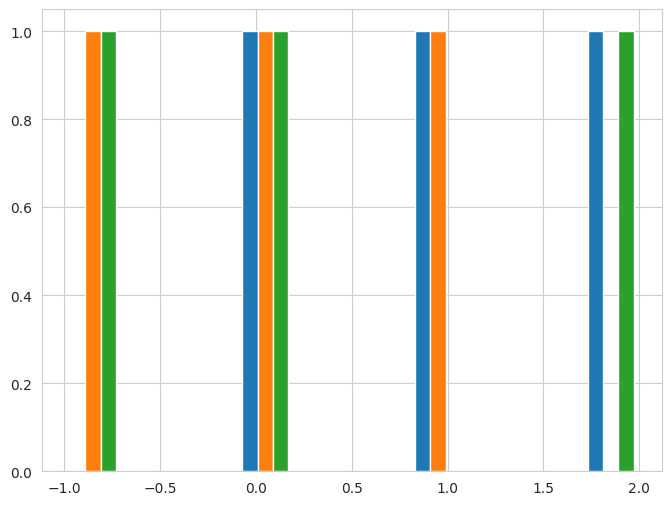

In [13]:
plt.figure(figsize = (8,6))
plt.hist(x_train)

- Ahora puedes hacer uso de transform para un nuevo dataset

In [14]:
x_test = [[-1., 1., 0.]]

scaler.transform(x_test)

array([[-2.44948974,  1.22474487, -0.26726124]])

# 🔢 Min-Max o Escalado de Características a un Rango

## 📌 Objetivo
- Escalar las características para que estén dentro de un **rango mínimo y máximo dado**, comúnmente:  
  \[
  [0, 1]
  \]
- También puede usarse otro rango, por ejemplo \([-1, 1]\).

---

## 🎯 Beneficios
- Evita que las características con **desviaciones estándar pequeñas** sean dominadas por otras con mayor escala.  
- **Preserva los ceros** en datos dispersos (útil en representaciones *sparse*).  
- Mantiene la **forma de la distribución** de los datos, solo cambiando su escala.  

---

## 📐 Fórmula

\[
X' = \frac{X - X_{min}}{X_{max} - X_{min}}
\]

donde:  
- \( X \): valor original.  
- \( X_{min} \): valor mínimo de la característica.  
- \( X_{max} \): valor máximo de la característica.  
- \( X' \): valor escalado en el rango [0, 1].  

---

👉 En resumen:  
El **Min-Max Scaling** ajusta las características a un rango definido, normalmente [0,1], manteniendo proporciones relativas entre los valores y evitando que una variable domine sobre las demás.


# 🔢 MinMaxScaler

El **MinMaxScaler** es una herramienta de `scikit-learn` que **escala los datos al rango [0, 1]** (por defecto).  

---

## 📌 ¿Qué hace?
- Transforma cada característica de forma que:
  - El valor mínimo de la característica → **0**  
  - El valor máximo de la característica → **1**  
- Mantiene la **proporción relativa** entre los valores intermedios.  

---

## 📐 Fórmula

\[
X' = \frac{X - X_{min}}{X_{max} - X_{min}}
\]

---

## ⚙️ Uso en scikit-learn

```python
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [15]:
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])

min_max_scaler = preprocessing.MinMaxScaler()

X_train_minmax = min_max_scaler.fit_transform(X_train)

X_train_minmax

array([[0.5       , 0.        , 1.        ],
       [1.        , 0.5       , 0.33333333],
       [0.        , 1.        , 0.        ]])

## MaxAbsScaler

- Escala los datos al rango [−1,1], dividiendo por el valor absoluto máximo de cada característica.
Es ideal para datos ya centrados en 0 o datos dispersos (sparse).

In [16]:
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])

max_abs_scaler = preprocessing.MaxAbsScaler()
X_train_maxabs = max_abs_scaler.fit_transform(X_train)
X_train_maxabs 

array([[ 0.5, -1. ,  1. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  1. , -0.5]])

In [17]:
X_test = np.array([[ -1., -0.5,  2.], [0., 0.5, -0.6]])
X_test_maxabs = max_abs_scaler.transform(X_test)
X_test_maxabs

array([[-0.5, -0.5,  1. ],
       [ 0. ,  0.5, -0.3]])

# ⚙️ Escalado y Normalización de Datos en scikit-learn

---

## 📊 Escalado de Datos Dispersos (Sparse)

- **Centrar datos dispersos** (restar la media) **destruiría su estructura**, por lo que rara vez se hace.  
- Sin embargo, sí se puede aplicar **escalado sin centrar** si las características están en diferentes escalas.  

### ✅ Herramientas adecuadas:
- `MaxAbsScaler`  
- `maxabs_scale`  

Estos métodos escalan los datos dividiendo por el valor absoluto máximo, preservando la dispersión (estructura *sparse*).  

---

## 🔄 Escalado vs Blanqueamiento (Whitening)

A veces no basta con **centrar y escalar** las características.  
El **blanqueamiento (whitening)** además **elimina la correlación entre características**.  

### 📐 Implementación:
- `sklearn.decomposition.PCA(whiten=True)`  
- `sklearn.decomposition.RandomizedPCA(whiten=True)`  

### 🎯 Cuándo usarlo:
- Si tu modelo requiere que las características sean **independientes entre sí**.  

---

## 🔢 Normalización

La **normalización** escala **cada muestra individual** para que tenga **norma unitaria**.  

### 📌 Usos:
- Útil cuando se emplean funciones basadas en **productos punto** o kernels.  
- Muy común en **clasificación y clustering de textos**, donde se usa el **Modelo de Espacio Vectorial**.  

### 🔹 Tipos de normalización:

#### 1. L1 Normalization
- Basada en **valores absolutos**.  
- Garantiza que la **suma de los valores absolutos de cada fila = 1**.  

#### 2. L2 Normalization
- Basada en **cuadrados mínimos**.  
- Garantiza que la **suma de los cuadrados en cada fila = 1** (norma euclidiana).  

---

👉 En resumen:  
- **Sparse data** → usar `MaxAbsScaler` para preservar la estructura.  
- **Whitening** → útil cuando se necesitan variables **independientes**.  
- **Normalización** → asegura que cada muestra tenga norma unitaria, muy útil en modelos que usan similitud entre vectores.  


In [18]:
X = [[ 1., -1.,  2.],
     [ 2.,  0.,  0.],
     [ 0.,  1., -1.]]
X_normalized = preprocessing.normalize(X, norm='l2')

X_normalized 

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

- preprocessing.Normalizer es una clase que aplica la misma operación usando la API de tipo Transformer.

In [19]:
normalizer = preprocessing.Normalizer().fit(X)  # fit does nothing
normalizer

,norm,'l2'
,copy,True


In [20]:
normalizer.transform(X)

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

In [21]:
normalizer.transform([[-1.,  1., 0.]])

array([[-0.70710678,  0.70710678,  0.        ]])

# 🔲 Binarización

La **binarización de características** es el proceso de aplicar un **umbral** a valores numéricos para transformarlos en valores booleanos (0 o 1).  

---

## 📌 Objetivo
- Convertir datos continuos o enteros en datos **binarios**.  
- Útil en modelos que necesitan trabajar con variables que representen **presencia/ausencia**.  

---

## 🎯 Usos comunes

1. **Modelos probabilísticos**  
   - Muchos suponen que los datos siguen una **distribución de Bernoulli multivariada**.  
   - La binarización facilita este tipo de representaciones.  

2. **Procesamiento de texto**  
   - Es común usar características binarias (ejemplo: palabra aparece = 1, no aparece = 0).  
   - Incluso si ya se tienen representaciones más ricas como frecuencias normalizadas o valores **TF-IDF**,  
     en la práctica a veces los modelos binarizados rinden mejor.  

---

## ⚙️ En scikit-learn

```python
from sklearn.preprocessing import Binarizer

binarizer = Binarizer(threshold=0.0)
X_binarized = binarizer.fit_transform(X)


In [22]:
X = [[ 1., -1.,  2.],
     [ 2.,  0.,  0.],
     [ 0.,  1., -1.]]

binarizer = preprocessing.Binarizer().fit(X)  # fit does nothing
binarizer

,threshold,0.0
,copy,True


In [23]:
binarizer.transform(X)

array([[1., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [24]:
binarizer = preprocessing.Binarizer(threshold=-0.5)

binarizer.transform(X)

array([[1., 0., 1.],
       [1., 1., 1.],
       [1., 1., 0.]])

## CODIFICACION DE CARACTERISTICAS CATEGORICAS

- consiste en transformar datos categóricos (como 'rojo', 'azul', 'verde', o 'sí', 'no') en un formato numérico que los modelos de machine learning puedan entender.

In [25]:
source = ['australia', 'singapore', 'new zealand', 'hong kong']

label_enc = preprocessing.LabelEncoder()
src = label_enc.fit_transform(source)

print("country to code mapping:\n") 
for k, v in enumerate(label_enc.classes_): 
    print(v,'\t', k)

country to code mapping:

australia 	 0
hong kong 	 1
new zealand 	 2
singapore 	 3


In [26]:
test_data = ['hong kong', 'singapore', 'australia', 'new zealand']
result = label_enc.transform(test_data)
print(result)

[1 3 0 2]


## CODIFICACION ONE HOT / ONE-OF-K

- Útil para trabajar con matrices dispersas (sparse matrix) -Utiliza el esquema "one-of-k"

- El proceso de convertir una serie de respuestas categóricas en un conjunto de resultados binarios (0 o 1)

In [27]:
source

['australia', 'singapore', 'new zealand', 'hong kong']

In [28]:
src

array([0, 3, 2, 1])

In [30]:
from sklearn.preprocessing import OneHotEncoder
one_hot_enc = OneHotEncoder(sparse_output=False, categories='auto')
src = src.reshape(len(src), 1)
one_hot = one_hot_enc.fit_transform(src)
print(one_hot)

[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]


In [31]:
invert_res = label_enc.inverse_transform([np.argmax(one_hot[0, :])])
print(invert_res)

['australia']


In [32]:
invert_res = label_enc.inverse_transform([np.argmax(one_hot[3, :])])
print(invert_res)

['hong kong']
